In [130]:
import pandas as pd
import numpy as np
import scipy.stats as st
from time import time
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import itertools
from sklearn.manifold import TSNE

from context import predicate_search
from predicate_search import PredicateInduction, RobustNormal, Density, BottomUp, Predicate

In [21]:
data = pd.read_csv('../data/breast_cancer_s1.csv')

In [22]:
refit = False

In [23]:
if refit:
    predicate_induction = PredicateInduction(data, [])
    with open('breast_cancer_s1_pixal.pkl', 'wb') as f:
        pickle.dump(predicate_induction, f)
else:
    with open('breast_cancer_s1_pixal.pkl', 'rb') as f:
        predicate_induction = pickle.load(f)

In [24]:
all_features = ','.join(data.columns)

In [25]:
distances = {all_features: predicate_induction.model.distance(predicate_induction.norm_data)}

In [26]:
k=3

In [27]:
for n in range(1, k+1):
    for group in itertools.combinations(data.columns, n):
        features = list(group)
        dist = predicate_induction.model.distance(predicate_induction.norm_data[features])
        distances[','.join(features)] = dist

In [28]:
distances = pd.DataFrame(distances)

In [45]:
distances

,"radius_mean,radius_ste,radius_worst,texture_mean,texture_ste,texture_worst,perimeter_mean,perimeter_ste,perimeter_worst,area_mean,area_ste,area_worst,smoothness_mean,smoothness_ste,smoothness_worst,compactness_mean,compactness_ste,compactness_worst,concavity_mean,concavity_ste,concavity_worst,nconcave_mean,nconcave_ste,nconcave_worst,symmetry_mean,symmetry_ste,symmetry_worst,fractal_mean,fractal_ste,fractal_worst",radius_mean,radius_ste,radius_worst,texture_mean,texture_ste,texture_worst,perimeter_mean,perimeter_ste,perimeter_worst,...,"symmetry_ste,symmetry_worst,fractal_mean","symmetry_ste,symmetry_worst,fractal_ste","symmetry_ste,symmetry_worst,fractal_worst","symmetry_ste,fractal_mean,fractal_ste","symmetry_ste,fractal_mean,fractal_worst","symmetry_ste,fractal_ste,fractal_worst","symmetry_worst,fractal_mean,fractal_ste","symmetry_worst,fractal_mean,fractal_worst","symmetry_worst,fractal_ste,fractal_worst","fractal_mean,fractal_ste,fractal_worst"
0,6.241255,0.990504,0.791067,1.049264,1.031311,0.586759,0.238683,1.426168,2.155136,0.865196,...,2.709636,2.117994,2.033005,2.647515,2.562399,1.220316,1.886099,2.254943,1.843360,2.355195
1,7.204207,0.642694,0.446570,0.839411,0.576119,1.475594,2.332770,0.382436,0.657119,1.295173,...,2.624083,2.400016,2.430815,2.626564,2.675532,1.990653,1.612584,1.040553,1.350138,1.457250
2,9.895820,2.061156,1.281018,2.060685,1.843383,1.008749,0.511267,0.420281,0.269840,0.498143,...,0.928804,0.975815,1.237346,0.995053,1.263330,1.299380,0.829406,0.800280,0.984847,0.836222
3,14.874978,0.604888,0.244976,0.493097,0.613478,0.141884,1.760115,0.616479,0.489478,1.326634,...,2.194418,2.522806,2.250331,2.474100,2.205156,2.428625,2.011780,1.877845,2.311440,2.310288
4,10.058379,3.050149,0.158213,3.050318,2.551241,0.492475,0.762777,1.101496,1.600484,0.256937,...,2.005335,1.749354,0.998929,2.473511,2.029712,1.557393,2.431266,1.865512,1.768614,2.404989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,17.499161,0.166344,0.449122,0.488510,0.154353,3.333816,4.302706,5.965606,5.120690,1.924406,...,5.595634,5.738497,6.137047,5.802380,6.124352,6.242953,5.216307,6.068270,6.200743,5.944461
363,32.173872,4.551783,0.643061,4.734873,5.688433,0.297499,1.508146,3.719789,4.503015,0.388027,...,4.813815,3.442681,3.419183,4.649111,4.650497,1.460841,4.042401,4.112337,2.912384,4.112344
364,14.256469,1.119043,0.859966,1.363469,1.145355,2.519128,4.050738,2.771666,3.234497,2.495960,...,4.046982,3.646390,4.719536,3.157021,4.651841,4.478016,3.010902,5.098826,4.526607,4.612133
365,19.293878,0.582205,1.112597,1.053850,0.574152,3.288047,5.365555,7.364884,6.253839,3.303477,...,5.756991,6.339204,5.732269,6.354103,5.749116,6.362468,5.887895,5.121266,5.830176,5.801143


In [118]:
threshold = 40

In [119]:
targets_str = distances[distances > threshold].count().argmax()

/Users/bmontambault/anaconda3/envs/forecasting/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if __name__ == '__main__':


In [120]:
above_threshold = distances[targets_str][distances[targets_str] > threshold]

In [121]:
targets = targets_str.split(',')

In [128]:
tsne = TSNE(n_components=2)
projection = pd.DataFrame(tsne.fit_transform(data))

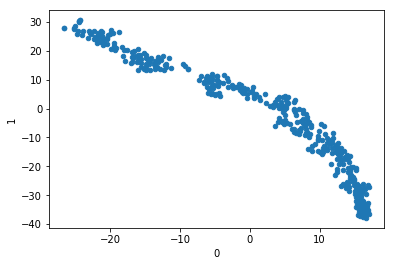

In [129]:
projection.plot.scatter(x=0, y=1)

In [132]:
data.iloc[-10:]

,radius_mean,radius_ste,radius_worst,texture_mean,texture_ste,texture_worst,perimeter_mean,perimeter_ste,perimeter_worst,area_mean,...,concavity_worst,nconcave_mean,nconcave_ste,nconcave_worst,symmetry_mean,symmetry_ste,symmetry_worst,fractal_mean,fractal_ste,fractal_worst
357,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
358,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
359,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
360,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
361,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
362,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
363,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
364,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
365,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
366,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [138]:
# sns.pairplot(data=data.assign(label=data.index>=357), hue='label', diag_kind=None)

In [124]:
index = list(above_threshold.index)

In [125]:
index

[18, 20, 44, 69, 85, 145, 357, 358, 359, 360, 361, 366]

In [126]:
len(index)

12

In [136]:
index = data[data.index>=157].index

In [137]:
p = predicate_induction.find_predicates(targets=targets, c=.4, quantile=.25, index=index, maxiters=1,
                                         topn=5)

iter: 0
merging
texture_mean in [13]: 5630.751111371909 texture_mean in [12, 13]: 3140.7630481154183
texture_mean in [13]: 5630.751111371909 texture_mean in [13, 14]: 3078.021454613594
fractal_worst in [45]: 5396.369518788158 fractal_worst in [44, 45]: 4847.966545844468
smoothness_ste in [29]: 5253.6268145831145 smoothness_ste in [28, 29]: 4078.0505758362133
smoothness_worst in [45]: 4598.64883720001 smoothness_worst in [44, 45]: 4239.269341779138
radius_worst in [21]: 4533.288285419499 radius_worst in [21, 22]: 3694.5305884565328
radius_worst in [21]: 4533.288285419499 radius_worst in [20, 21]: 3561.4416818559
texture_ste in [48]: 4125.671635993014 texture_ste in [48, 49]: 3109.04904397266
texture_ste in [48]: 4125.671635993014 texture_ste in [47, 48]: 3262.647860646554
symmetry_ste in [24]: 4009.1274254727186 symmetry_ste in [24, 25]: 3258.532073454541
symmetry_ste in [24]: 4009.1274254727186 symmetry_ste in [23, 24]: 3328.567933137909
radius_mean in [80]: 3687.042117423409 radius_me

concavity_ste in [29]: 1194.6277837646285 concavity_ste in [28, 29]: 1390.501434001104
concavity_ste in [28, 29]: 1390.501434001104 concavity_ste in [27, 28, 29]: 1295.9455927918768
nconcave_worst in [31]: 1166.4352797044137 nconcave_worst in [31, 32]: 930.3582304549356
nconcave_worst in [31]: 1166.4352797044137 nconcave_worst in [30, 31]: 774.0606813851309
radius_worst in [56]: 1153.990891373685 radius_worst in [56, 57]: 961.4293035542753
radius_worst in [56]: 1153.990891373685 radius_worst in [55, 56]: 812.4031586813804
nconcave_mean in [15]: 1125.6870542775032 nconcave_mean in [14, 15]: 687.6472414227983
nconcave_mean in [15]: 1125.6870542775032 nconcave_mean in [15, 16]: 500.29437280349083
symmetry_mean in [20]: 1114.720593321752 symmetry_mean in [19, 20]: 1017.2921084892458
symmetry_mean in [20]: 1114.720593321752 symmetry_mean in [20, 21]: 787.0434177032894
concavity_ste in [31]: 1110.6821171728097 concavity_ste in [31, 32]: 1031.9200267200554
radius_mean in [54]: 1070.3004534486

perimeter_mean in [22]: 506.88216531059413 perimeter_mean in [22, 23]: 495.89730501533944
perimeter_mean in [22]: 506.88216531059413 perimeter_mean in [21, 22]: 403.80891685654643
symmetry_mean in [13]: 491.25124362969797 symmetry_mean in [12, 13]: 409.86387216822834
compactness_mean in [35]: 488.35018252698796 compactness_mean in [35, 36]: 444.33342149404257
compactness_mean in [35]: 488.35018252698796 compactness_mean in [34, 35]: 422.12941331957666
compactness_worst in [26]: 480.80596515793184 compactness_worst in [25, 26]: 681.1622702340505
compactness_worst in [25, 26]: 681.1622702340505 compactness_worst in [25, 26, 27]: 687.519077395878
compactness_worst in [25, 26, 27]: 687.519077395878 compactness_worst in [25, 26, 27, 28]: 677.5643936413333
compactness_worst in [25, 26, 27]: 687.519077395878 compactness_worst in [24, 25, 26, 27]: 539.6088369048716
symmetry_ste in [17]: 471.6736915347831 symmetry_ste in [17, 18]: 101.05680343909206
symmetry_ste in [17]: 471.6736915347831 symme

symmetry_worst in [27]: 276.7526971916958 symmetry_worst in [26, 27]: 202.27108722497132
symmetry_worst in [27]: 276.7526971916958 symmetry_worst in [27, 28]: 153.80776955910596
area_ste in [25]: 275.5987133147882 area_ste in [24, 25]: 324.6016294339726
area_ste in [24, 25]: 324.6016294339726 area_ste in [24, 25, 26]: 214.7995859454916
area_ste in [24, 25]: 324.6016294339726 area_ste in [23, 24, 25]: 136.24704394982112
symmetry_worst in [19]: 271.5411727116418 symmetry_worst in [18, 19]: 109.93514845718062
symmetry_worst in [19]: 271.5411727116418 symmetry_worst in [19, 20]: 73.3914499927517
texture_mean in [27]: 269.654425391754 texture_mean in [27, 28]: 151.60869274530634
texture_mean in [27]: 269.654425391754 texture_mean in [26, 27]: -5.2587254689338545
concavity_worst in [5]: 268.04128374667175 concavity_worst in [4, 5]: 322.2201357179421
concavity_worst in [4, 5]: 322.2201357179421 concavity_worst in [4, 5, 6]: 334.98099720876013
area_mean in [27]: 267.8497385603233 area_mean in 

concavity_worst in [16]: 166.79611761563143 concavity_worst in [15, 16]: 147.92618388878662
nconcave_worst in [4]: 165.5820771957331 nconcave_worst in [3, 4]: 168.51721539896064
area_mean in [42]: 160.75077058617688 area_mean in [41, 42]: 196.22460269339027
area_mean in [41, 42]: 196.22460269339027 area_mean in [40, 41, 42]: 189.03843956762697
texture_mean in [2]: 159.04197694120305 texture_mean in [2, 3]: 163.17102184616087
area_mean in [17]: 156.65891027013143 area_mean in [17, 18]: 0.35310564639072994
area_mean in [17]: 156.65891027013143 area_mean in [16, 17]: -3.437014106538751
symmetry_mean in [42]: 155.40919567536037 symmetry_mean in [42, 43]: 7.111153579440165
smoothness_mean in [38]: 151.31083522956786 smoothness_mean in [38, 39]: 138.31070067014622
texture_worst in [22]: 148.40220362489544 texture_worst in [22, 23]: -0.2563015487929935
texture_worst in [22]: 148.40220362489544 texture_worst in [21, 22]: -133.92217154395257
concavity_mean in [41]: 147.71149700275762 concavity_

perimeter_worst in [34, 35]: 77.278820020675 perimeter_worst in [33, 34, 35]: -66.80046454003146
radius_ste in [74]: 71.18194149485355 radius_ste in [73, 74]: 46.387215633664226
radius_ste in [74]: 71.18194149485355 radius_ste in [74, 75]: -37.5514784443481
nconcave_worst in [20]: 69.54760024327506 nconcave_worst in [20, 21]: -76.30575349753308
nconcave_worst in [20]: 69.54760024327506 nconcave_worst in [19, 20]: -271.1591286874853
symmetry_mean in [77]: 66.46786170816995 symmetry_mean in [76, 77]: 14.402044398370524
fractal_mean in [34]: 66.02548018911456 fractal_mean in [33, 34]: 9.559953373907973
fractal_mean in [34]: 66.02548018911456 fractal_mean in [34, 35]: -29.489901926324357
texture_worst in [37]: 61.71427299416297 texture_worst in [37, 38]: 81.370429932115
fractal_mean in [42]: 60.51726331614713 fractal_mean in [41, 42]: 79.34424680505371
fractal_mean in [41, 42]: 79.34424680505371 fractal_mean in [41, 42, 43]: 71.88904977347224
fractal_mean in [41, 42]: 79.34424680505371 fra

texture_mean in [53]: -9.755638950344292 texture_mean in [53, 54]: -34.24198925771274
radius_worst in [46]: -12.130465117223133 radius_worst in [46, 47]: -168.30936107378412
radius_worst in [46]: -12.130465117223133 radius_worst in [45, 46]: -165.71922792079428
smoothness_mean in [22]: -13.318267409967602 smoothness_mean in [22, 23]: -88.33961782768164
smoothness_mean in [22]: -13.318267409967602 smoothness_mean in [21, 22]: -87.53974276196908
symmetry_mean in [58]: -14.341531712661817 symmetry_mean in [57, 58]: -61.733828664096514
symmetry_mean in [58]: -14.341531712661817 symmetry_mean in [58, 59]: -125.1000464676728
smoothness_worst in [64]: -14.615722408463625 smoothness_worst in [63, 64]: -47.04782146043993
nconcave_mean in [63]: -14.615722408463625 nconcave_mean in [63, 64]: -64.71798047022581
concavity_worst in [51]: -15.261778417243931 concavity_worst in [51, 52]: -69.37647344249157
concavity_worst in [51]: -15.261778417243931 concavity_worst in [50, 51]: -81.06505361630397
tex

fractal_mean in [8]: -47.65783491444347 fractal_mean in [7, 8]: -81.13374806100462
fractal_mean in [8]: -47.65783491444347 fractal_mean in [8, 9]: -131.74456493065412
area_mean in [6]: -48.968593561327324 area_mean in [5, 6]: -130.43547888466784
area_mean in [6]: -48.968593561327324 area_mean in [6, 7]: -218.16011501327375
concavity_worst in [53]: -49.291929781687024 concavity_worst in [52, 53]: -99.60706030888272
concavity_mean in [33]: -49.453798814740296 concavity_mean in [33, 34]: -102.48895054880987
radius_mean in [56]: -49.782772557011356 radius_mean in [56, 57]: -138.47006085433006
radius_mean in [56]: -49.782772557011356 radius_mean in [55, 56]: -150.30803764636622
texture_ste in [47]: -49.92107343163851 texture_ste in [46, 47]: -157.15799587388904
radius_mean in [46]: -50.0520350542912 radius_mean in [46, 47]: -179.08491595824097
radius_mean in [46]: -50.0520350542912 radius_mean in [45, 46]: -199.57873209643844
perimeter_worst in [53]: -50.6639995634925 perimeter_worst in [52

nconcave_mean in [37, 38] 635.279701965163
symmetry_mean in [55] 634.1980901300625
compactness_mean in [21] 630.773982653633
symmetry_mean in [52] 616.4186508641641
radius_ste in [58] 580.2185781773073
symmetry_worst in [11] 576.1276438903225
smoothness_worst in [69] 574.9394643778941
concavity_ste in [19] 574.9394643778941
perimeter_ste in [0] 573.2966539880676
compactness_worst in [0] 573.2966539880676
fractal_mean in [0] 573.2966539880676
area_worst in [41] 528.4108955418893
radius_worst in [22] 527.5887609130145
nconcave_ste in [41] 517.5345795104763
perimeter_ste in [29] 516.373617368061
fractal_worst in [31, 32, 33] 515.6979557127037
area_mean in [45, 46, 47] 513.314555423824
perimeter_mean in [22] 506.88216531059413
compactness_worst in [53, 54] 504.33693560108105
symmetry_mean in [13] 491.25124362969797
compactness_mean in [35] 488.35018252698796
concavity_ste in [38, 39] 477.55018791406883
symmetry_ste in [17] 471.6736915347831
symmetry_ste in [32, 33] 463.2888606070284
smooth

fractal_ste in [0] 122.22429841349367
smoothness_ste in [0] 121.86964202849934
radius_worst in [24] 120.7193278330872
symmetry_worst in [12] 116.39370815432856
nconcave_worst in [8] 115.68742277161097
area_ste in [42] 115.45247988379104
compactness_worst in [28] 112.78469186855563
smoothness_worst in [77] 112.69854309379662
concavity_mean in [51] 112.69854309379662
texture_mean in [9, 10] 111.3123748017985
area_ste in [39, 40] 110.61293254958709
texture_mean in [12] 110.27327656653537
area_worst in [37] 108.87918386015541
perimeter_ste in [35] 108.56135148766941
smoothness_worst in [67] 108.24909427759245
symmetry_mean in [19] 107.79761474855316
texture_worst in [33] 107.75631711440123
area_mean in [38, 39, 40] 106.7968430103179
fractal_worst in [14] 104.72254023212724
radius_worst in [28] 104.68201380579819
texture_worst in [61] 102.6628597715935
perimeter_mean in [34] 102.6628597715935
perimeter_ste in [42] 102.6628597715935
smoothness_mean in [51] 102.6628597715935
compactness_mean 

radius_ste in [6] -28.90928892555894
texture_mean in [50] -28.90928892555894
nconcave_mean in [7] -28.90928892555894
radius_mean in [67] -29.549712967407686
radius_worst in [66] -29.549712967407686
texture_mean in [56] -29.549712967407686
texture_ste in [21] -30.37679310541036
fractal_worst in [36] -30.523818041230697
symmetry_mean in [46] -30.938421147367016
smoothness_worst in [51] -30.96287412028279
symmetry_mean in [30] -31.10913213249057
fractal_mean in [53] -31.457947297234693
texture_ste in [19] -32.12506921656982
concavity_worst in [14] -32.140223158701694
compactness_ste in [16] -32.31991903162507
fractal_mean in [40] -32.32249418129786
concavity_worst in [39] -32.522588174671554
perimeter_worst in [82] -32.65533663224778
smoothness_worst in [12] -32.80627234071446
symmetry_worst in [34] -33.08263587571855
concavity_mean in [47] -33.1081648789642
concavity_worst in [23] -33.279683349156436
smoothness_worst in [27] -33.627256746044715
radius_mean in [69] -33.7656528585685
radiu

concavity_worst in [43] -85.95310168310328
concavity_mean in [3] -86.25475284667228
concavity_worst in [47] -86.5243621310312
area_ste in [17] -86.6043280583873
texture_mean in [37] -86.92676530846197
nconcave_mean in [49] -87.57039867933392
concavity_worst in [50] -87.7997121765765
radius_worst in [20] -87.91249842753255
fractal_mean in [15] -88.13547960096165
concavity_ste in [13] -88.99569471624396
perimeter_worst in [62] -89.45345171083586
area_mean in [35] -89.47382783266414
radius_ste in [24] -89.64303201541902
radius_mean in [30] -89.69358071100432
symmetry_worst in [28] -89.8498612341924
compactness_mean in [23] -90.01051920039428
radius_worst in [27] -90.7839271368383
nconcave_mean in [57] -90.80827192703482
radius_ste in [48] -91.06911281358626
fractal_worst in [3] -91.35248347307979
fractal_mean in [44] -92.02167907557819
fractal_mean in [48] -92.08399911591407
nconcave_mean in [66] -92.09532837340359
area_mean in [36] -92.72982676421759
nconcave_mean in [78] -93.42608188736

area_worst in [20] -149.78036808553767
texture_ste in [46] -150.33917708066087
symmetry_mean in [59] -150.7289692394891
symmetry_mean in [31] -150.92887419016392
texture_worst in [8] -150.967817164496
fractal_ste in [31] -151.3864648157995
texture_ste in [43] -151.68104004525796
concavity_ste in [8] -151.78829443310167
smoothness_worst in [8] -151.8130538804501
fractal_mean in [27] -152.01910299283398
nconcave_ste in [38] -152.052405194428
radius_worst in [44] -152.1687510004637
fractal_ste in [17] -152.22811241256312
perimeter_worst in [19] -152.3944229093601
perimeter_worst in [18] -153.29426411630254
symmetry_mean in [24] -154.06799508839396
texture_mean in [18] -154.10445755451735
nconcave_worst in [21] -154.98209916132143
fractal_worst in [9] -155.49804123412798
radius_mean in [41] -155.77080324497882
nconcave_mean in [26] -155.98733443812927
perimeter_ste in [14] -156.06574768819584
perimeter_worst in [47] -156.15673253604223
perimeter_mean in [19] -156.8150039497574
radius_mean 

nconcave_mean in [31] -231.99381466105132
perimeter_mean in [1] -232.04476638559558
perimeter_ste in [7] -232.78223156836498
fractal_worst in [5] -233.24334399362547
texture_worst in [17] -233.5801762347708
symmetry_ste in [9] -233.93255231255364
fractal_ste in [19] -234.11754463335635
concavity_worst in [38] -234.28963931842742
concavity_mean in [20] -234.95031208420508
fractal_mean in [20] -235.06486446836487
texture_worst in [24] -235.2725472723279
texture_mean in [30] -235.88827466633765
area_mean in [8] -236.5832003047066
symmetry_mean in [40] -236.97239378892462
area_worst in [5] -237.15444023156206
texture_mean in [23] -237.90936290590724
texture_worst in [7] -238.7318735755287
concavity_mean in [13] -238.96696175103688
nconcave_mean in [45] -239.37979943839247
nconcave_mean in [32] -239.6200721408962
texture_mean in [21] -240.39425978690585
concavity_ste in [2] -241.57148918455667
symmetry_mean in [51] -241.76321421934563
texture_worst in [18] -241.93397280112023
area_mean in [

KeyboardInterrupt: 

In [64]:
for pi in p:
    print(pi, '\n')

((perimeter_mean >= 0.4108 and perimeter_mean <= 0.4108)) 

((area_mean >= 0.0928349494949495 and area_mean <= 0.09329545454545454)) 

((area_ste >= 0.8168383838383838 and area_ste <= 1.095)) 

((area_worst >= 2.645452525252525 and area_worst <= 2.6911575757575754)) 

((compactness_mean >= 0.094828 and compactness_mean <= 0.1064)) 



In [65]:
data[data.perimeter_mean == .4108]

,radius_mean,radius_ste,radius_worst,texture_mean,texture_ste,texture_worst,perimeter_mean,perimeter_ste,perimeter_worst,area_mean,...,concavity_worst,nconcave_mean,nconcave_ste,nconcave_worst,symmetry_mean,symmetry_ste,symmetry_worst,fractal_mean,fractal_ste,fractal_worst
69,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,0.09296,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259
